In [103]:
# Imports
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import geopandas as gpd

merge = pd.read_csv('../graphA/merge.csv', usecols=['Area','2020','2020/area','2020/pop'])
gdf = gpd.read_file('shapes/ne_110m_admin_0_countries.shp')



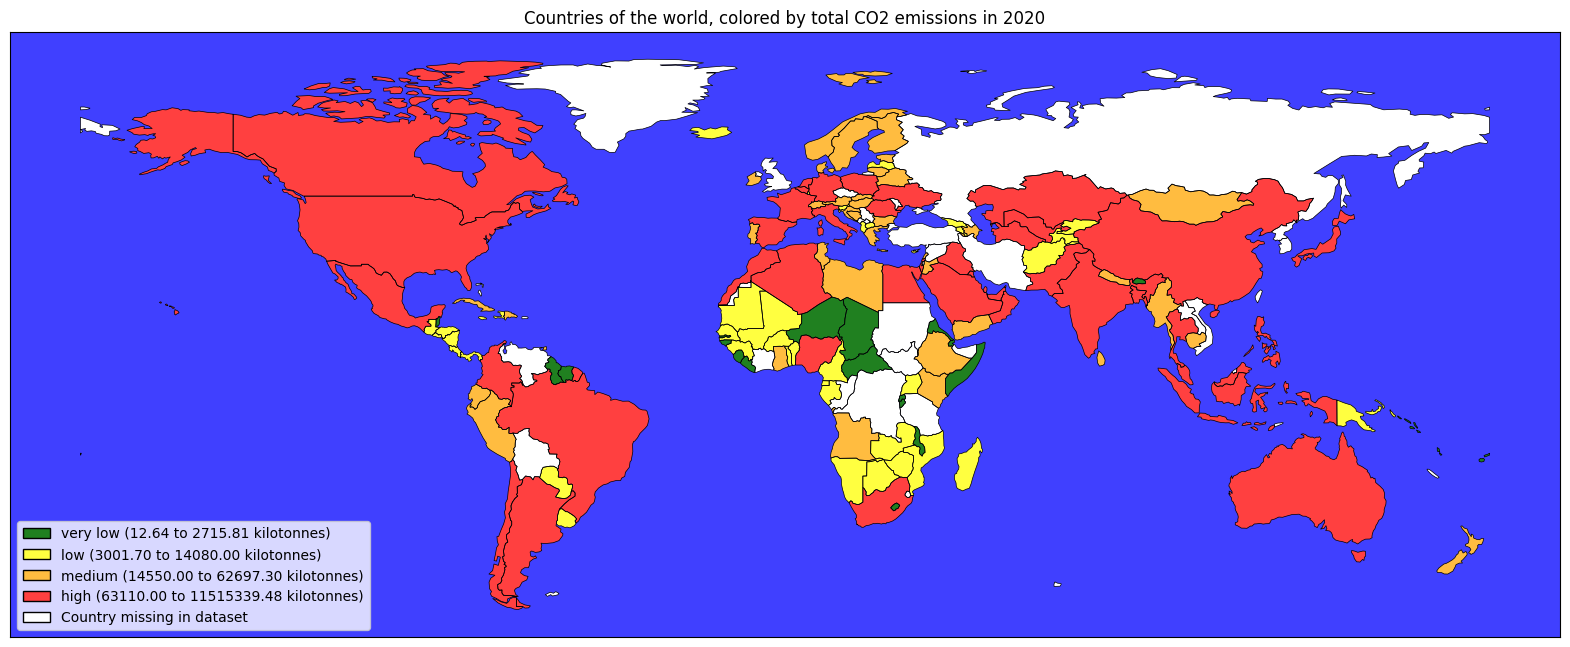

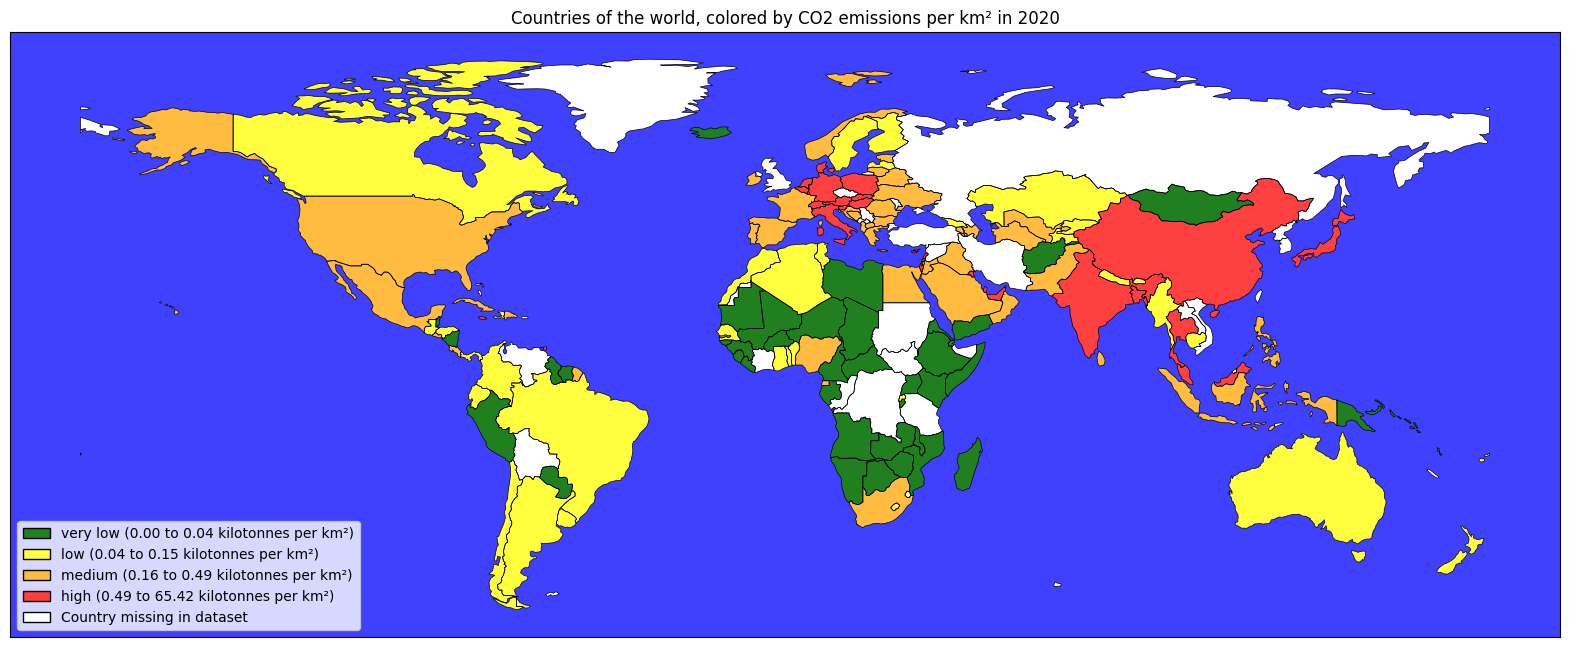

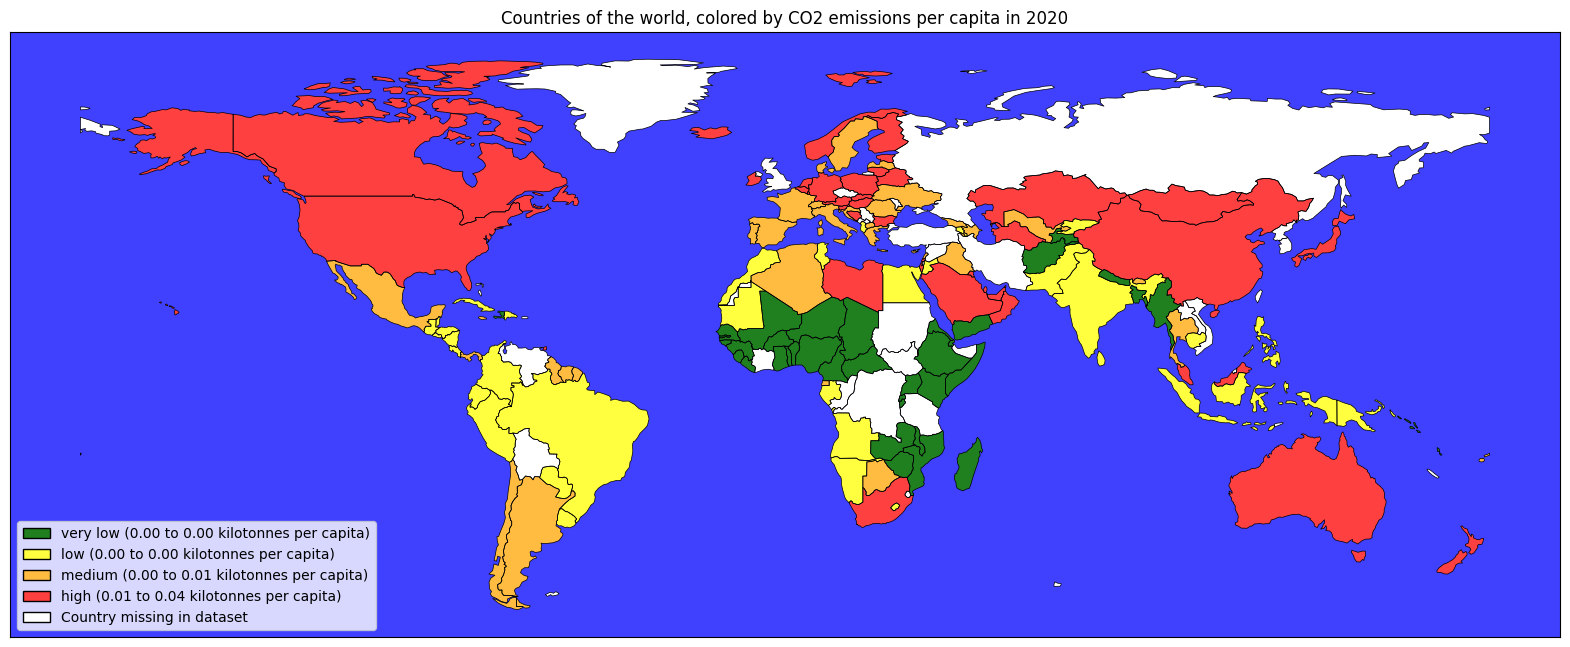

In [104]:
def plot_emissions_by_country(data, country_col, emission_col, graph_title, unit):
    # Load world map
    world = gpd.read_file('shapes/ne_110m_admin_0_countries.shp')
    # Remove Antarctica and Seven seas (open ocean) from the dataset
    world = world.loc[~world["ADMIN"].isin(["Antarctica", "Seven seas (open ocean)"])]
    
    # Fix the name of the United States in the world dataset
    data['Area'] = data['Area'].replace('United States', 'United States of America')

    # Initialize a final empty figure
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Start by plotting a map of the world
    world.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Categorize emission values into quartiles
    data[emission_col + '_quartile'] = pd.qcut(data[emission_col], 4, labels=False)
    
    # Calculate min and max values for each quartile
    quartile_ranges = data.groupby(emission_col + '_quartile')[emission_col].agg(['min', 'max'])
    
    # Original list of colors
    colors = ['green', 'yellow', 'orange', 'red']

    # Function to reduce saturation by 50%
    def reduce_saturation(color):
        # Convert color name to RGB
        rgb = mcolors.to_rgb(color)
        # Convert RGB to HSV
        hsv = mcolors.rgb_to_hsv(rgb)
        # Reduce saturation by 50%
        hsv[1] *= 0.5
        # Convert back to RGB
        return mcolors.hsv_to_rgb(hsv)

    # Apply the function to each color in the list
    colors = [reduce_saturation(color) for color in colors]
    
    # Modify the plotting loop to use quartile information
    for country_name in world["ADMIN"].unique():
        country = world[world["ADMIN"] == country_name]
        if country_name in data[country_col].values:
            rel_value = data[data[country_col] == country_name][emission_col + '_quartile'].values[0]
            color = colors[rel_value]
        else:
            color = 'white'
        country.plot(ax=ax, color=color, alpha=1)
    
    # Turn off axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Change the background color to light blue
    ax.set_facecolor((3, 96, 186))

    # Set the plot title and subtitle
    plt.title(graph_title)

    # Define new labels for the quartiles
    quartile_labels = ["very low", "low", "medium", "high"]

    # Create custom legend for the quartiles and missing countries
    legend_labels = [f'{quartile_labels[i]} ({quartile_ranges.iloc[i]["min"]:.2f} to {quartile_ranges.iloc[i]["max"]:.2f} {unit})' for i in range(4)]
    legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='black', label=legend_labels[i]) for i in range(4)]
    
    # Add the custom patch for countries missing in the dataset
    patch_missing = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
    legend_patches.append(patch_missing)
    plt.legend(handles=legend_patches, loc='lower left')
    
    plt.show()


plot_emissions_by_country(merge, 'Area', '2020', 'Countries of the world, colored by total CO2 emissions in 2020', 'kilotonnes')
plot_emissions_by_country(merge, 'Area', '2020/area', 'Countries of the world, colored by CO2 emissions per km² in 2020', 'kilotonnes per km²')
plot_emissions_by_country(merge, 'Area', '2020/pop', 'Countries of the world, colored by CO2 emissions per capita in 2020', 'kilotonnes per capita')

In [105]:
# Define new labels for the quartiles
quartile_labels = ["very low", "low", "medium", "high"]

# Create custom legend for the quartiles and missing countries
legend_labels = [f'{quartile_labels[i]} ({quartile_ranges.iloc[i]["min"]:.2f} - {quartile_ranges.iloc[i]["max"]:.2f}) {unit}' for i in range(4)]
legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='black', label=legend_labels[i]) for i in range(4)]

NameError: name 'quartile_ranges' is not defined

C:\Users\pjhoor\AppData\Local\Temp\ipykernel_19900\527326068.py:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_patches = [mpatches.Patch(color=colors[i], edgecolor='black', label=legend_labels[i]) for i in range(5)]


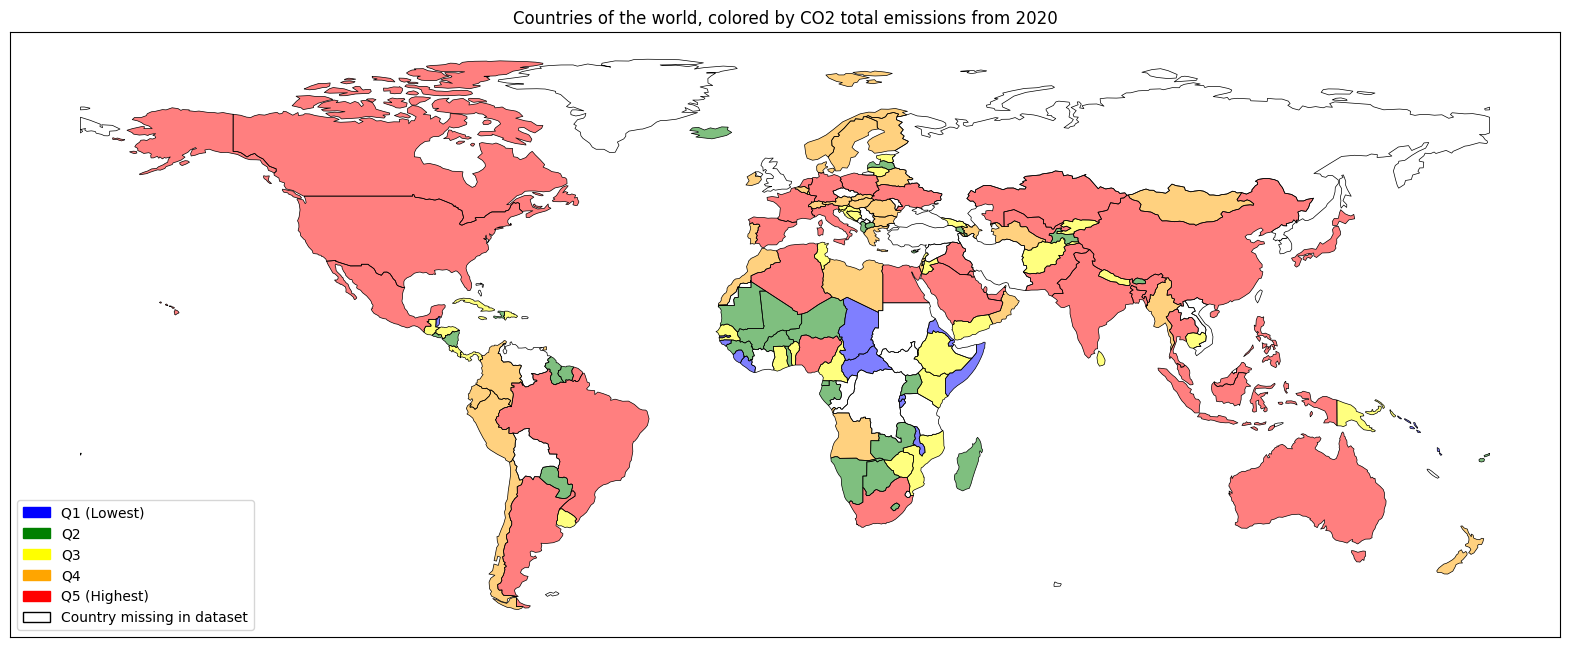

Quintile 1 (Q1): 33 countries
Quintile 2 (Q2): 32 countries
Quintile 3 (Q3): 33 countries
Quintile 4 (Q4): 32 countries
Quintile 5 (Q5): 33 countries


In [ ]:
#no trees

world = gpd.read_file('shapes/ne_110m_admin_0_countries.shp')

# initialize a final empty figure
fig, ax = plt.subplots(figsize=(20, 10))

# remove Antarctica and Seven seas (open ocean) from the dataset
world = world.loc[~world["ADMIN"].isin(["Antarctica", "Seven seas (open ocean)"])]

# Replace "United States" with "United States of America" in the 'Area' column
ems_2020['Area'] = ems_2020['Area'].replace('United States', 'United States of America')

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# Define a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom",
    [(0, 1, 0), (1, 1, 0), (1, 0, 0)],
    N=256
)

# Categorize '2020' values into quintiles
ems_2020['2020_quintile'] = pd.qcut(ems_2020['2020'], 5, labels=False)

# Define a list of colors for each quintile
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Modify the plotting loop to use quintile information
for country_name in world["ADMIN"].unique():
    country = world[world["ADMIN"] == country_name]
    if country_name in ems_2020['Area'].values:
        rel_value = ems_2020[ems_2020['Area'] == country_name]['2020_quintile'].values[0]
        color = colors[rel_value]
    else:
        color = 'white'
    country.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title and subtitle
plt.title("Countries of the world, colored by CO2 total emissions from 2020")

# Create custom legend for the quintiles and missing countries
legend_labels = ['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)']
legend_patches = [mpatches.Patch(color=colors[i], edgecolor='black', label=legend_labels[i]) for i in range(5)]

# Add the custom patch for countries missing in the dataset
patch_missing = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
legend_patches.append(patch_missing)
plt.legend(handles=legend_patches, loc='lower left')

plt.show()

# Count the number of countries in each quintile
quintile_counts = ems_2020['2020_quintile'].value_counts().sort_index()

# Print the counts for each quintile
for quintile, count in quintile_counts.items():
    print(f"Quintile {quintile + 1} (Q{quintile + 1}): {count} countries")


C:\Users\pjhoor\AppData\Local\Temp\ipykernel_19900\101590026.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


NameError: name 'ems_2020TREES' is not defined

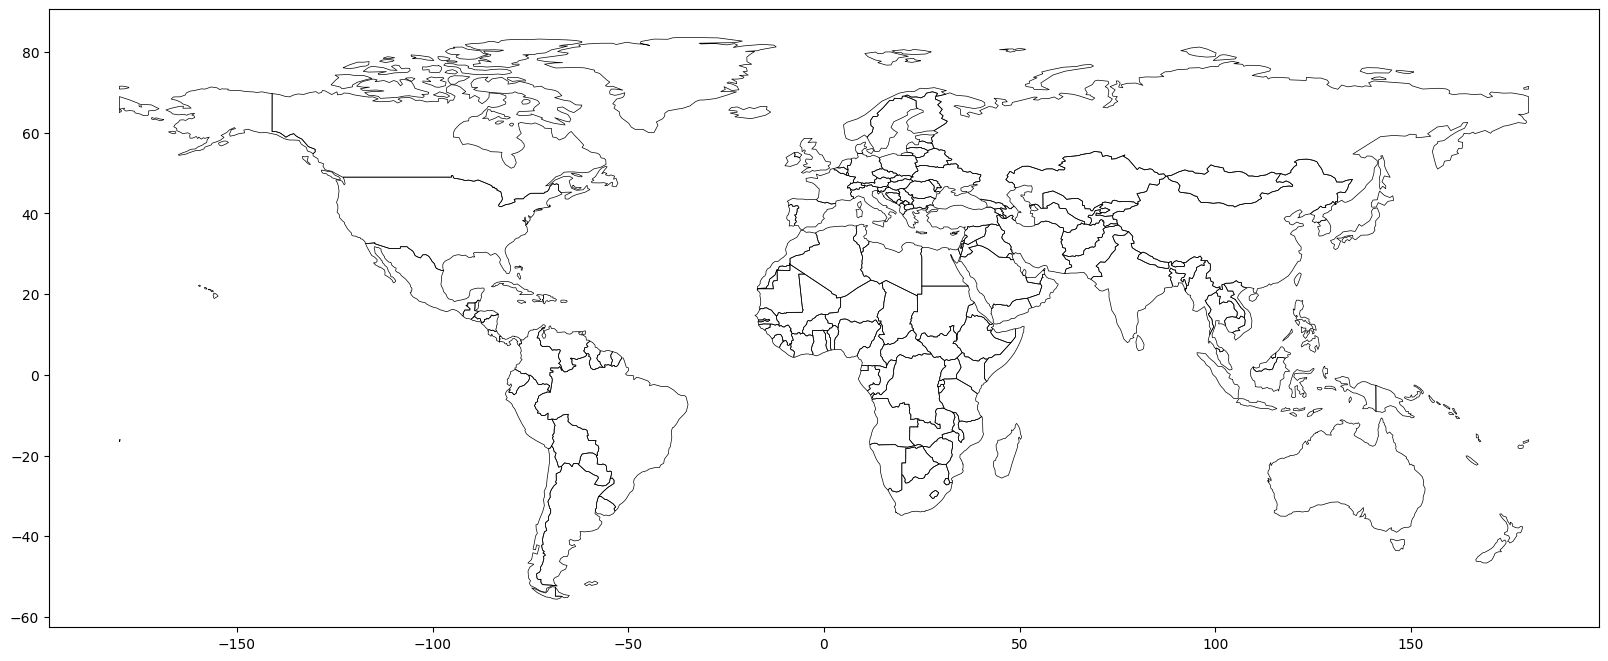

In [ ]:
#TREEES

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# initialize a final empty figure
fig, ax = plt.subplots(figsize=(20, 10))

# drop "Antarctica" and "Seven seas" from the dataframe
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# Define a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom",
    [(0, 1, 0), (1, 1, 0), (1, 0, 0)],
    N=256
)

# normalize the '2020' values to the range [0, 1] for the colormap
norm = plt.Normalize(ems_2020TREES['2020'].min(), ems_2020TREES['2020'].median())

# loop over the countries in the world dataframe
for country_name in world["name"].unique():
    # grab all countries that belong to the continent
    country = world[world["name"] == country_name]

    # check if the country is in the ems_2020TREES dataframe
    if country_name in ems_2020TREES['Area'].values:
        # get the '2020' value for the country
        rel_value = ems_2020TREES[ems_2020TREES['Area'] == country_name]['2020'].values[0]

        # get the color corresponding to the '2020rel' value
        color = cmap(norm(rel_value))
    else:
        # if the country is not in the ems_2020TREES dataframe, use white color
        color = 'white'

    # plot the country with the color
    country.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title and subtitle
plt.title("Countries of the world, colored by CO2 emissions from 2020 (LULUCF included)")


# create a ScalarMappable for the colorbar with unnormalized values
norm_cbar = plt.Normalize(ems_2020TREES['2020rel'].min(), ems_2020TREES['2020'].max())
sm_cbar = plt.cm.ScalarMappable(cmap=cmap, norm=norm_cbar)
sm_cbar.set_array([])
cbar = fig.colorbar(sm_cbar, orientation="vertical", fraction=0.036, pad=0.1, aspect = 30, cax=ax.inset_axes([1.0, 0, 0.05, 1]))

cbar.set_label("CO2 emissions from 2020 (in kilotonnes/km²)")

# create custom legend
patch1 = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
plt.legend(handles=[patch1], loc='lower left')

plt.show()
print (ems_2020TREES['2020'].min(), ems_2020TREES['2020'].max())